In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import string
import json
import mpld3

In [2]:
# Helper function to count the words in movie titles
def count_words(x):
    # remove eventual spaces at the beginning and at the end of the string, split the string, count the words
    return len(x.strip().split())

In [3]:
movies = pd.read_csv('Data/movies_preprocessed.csv')

# Add a column for the title length in words
movies['Title_length'] = movies['Movie_name'].apply(count_words)

In [27]:
movies.head(1)

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Title_length
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,3


In [4]:
plot_movies = movies.groupby(by='Movie_release_date')['Title_length'].agg( ['count','mean','sem'] ).reset_index()
plot_movies.head()

,Movie_release_date,count,mean,sem
0,1906,1,6.000000,NaN
1,1908,1,4.000000,NaN
2,1912,2,4.500000,3.500000
3,1913,3,1.333333,0.333333
4,1914,4,4.250000,0.750000


# Package mpld3

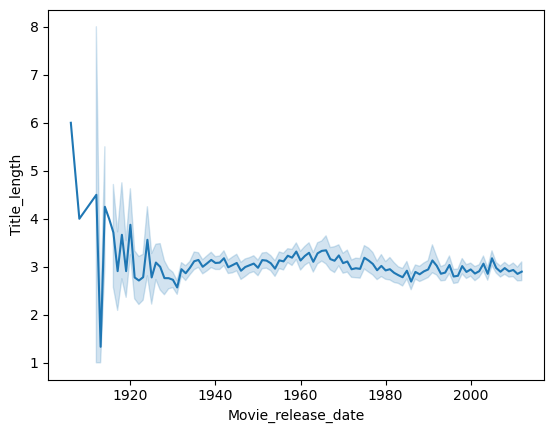

In [32]:
from mpld3 import plugins

points = sns.lineplot(x='Movie_release_date', y='Title_length', errorbar='ci', data=movies)


In [34]:
labels = list(plot_movies['count'])

#labels = plot_movies.to_html(index=False)
#labels = ['<h1>{title}</h1>'.format(title=i) for i in range(len(plot_movies))]

In [36]:
tooltip = plugins.PointHTMLTooltip(points, labels)
plugins.connect(fig, tooltip)
mpld3.display()

# Package plotly

In [6]:
import plotly.express as px

## First analyses

### Lineplot for time series

In [14]:
fig = px.line(plot_movies, x='Movie_release_date', y='mean', error_y='sem',
              text=plot_movies['Movie_release_date'].astype(str) +
                    ' (Count: ' + plot_movies['count'].astype(str) +
                    ', Mean: ' + plot_movies['mean'].round(2).astype(str) +
                    ', SEM: ' + plot_movies['sem'].round(2).astype(str) + ')',
              title='Average title length in words per year')

# Save the HTML file
fig.write_html("./time-series-length-words-v2.html")

In [17]:
fig = px.line(plot_movies, x='Movie_release_date', y='mean', error_y='sem',
              animation_frame='count',
              title='Average title length in words per year')

# Save the HTML file
fig.write_html("./time-series-length-words-v3.html")

In [17]:
## FINAL VERSION

fig = px.line(plot_movies, x='Movie_release_date', y='mean', error_y='sem', 
              hover_data={'Movie_release_date': True, 'mean': True, 'sem': False, 'count': True},
              labels={'mean': 'Mean title length (words)', 'Movie_release_date': 'Release year'},
              title='Average title length in words per year')

fig.update_traces(error_y_color='#87CEEB')

# Save the HTML file
fig.write_html("./time-series-length-words.html")

### Joint distributions / Heatmap

In [64]:
fig = px.scatter(movies, x='Movie_release_date', y='Title_length', 
                 opacity=0.2,
                 marginal_x='histogram',
                 marginal_y='histogram',
                 labels={'Title_length': 'Title length (words)', 'Movie_release_date': 'Release year'},
                 title='Joint distribution of Release year and Title length',
                 width=1000, height=800)

# Save the HTML file
fig.write_html("./time-series-joint-distributions.html")

In [66]:
fig = px.scatter(movies, x='Movie_release_date', y='Title_length', 
                 opacity=0.1,
                 marginal_x='histogram',
                 marginal_y='histogram',
                 range_y=(0,16),
                 labels={'Title_length': 'Title length (words)', 'Movie_release_date': 'Release year'},
                 title='Joint distribution of Release year and Title length without outliers',
                 width=1000, height=800)

# Save the HTML file
fig.write_html("./time-series-joint-distributions-filtered.html")

In [9]:
fig = px.density_heatmap(movies, x='Movie_release_date', y='Title_length', 
                 marginal_x='histogram',
                 marginal_y='histogram',
                 range_y=(0,12),
                 labels={'Title_length': 'Title length (words)', 'Movie_release_date': 'Release year'},
                 title='Joint distribution of Release year and Title length without outliers',
                 width=850, height=650)
    
# Save the HTML file
fig.write_html("./time-series-heatmap.html")

### Lineplot for genre time series

In [27]:
genres = movies.groupby(['Movie_main_genre', 'Movie_release_date'], as_index=False)['Title_length'].agg(['mean', 'sem', 'count']).reset_index()

fig = px.line(genres, x='Movie_release_date', y='mean', color='Movie_main_genre',
              hover_data={'Movie_release_date': True, 'mean': True, 'sem': True, 'count': True},
              labels={'mean': 'Average title Length', 'Movie_release_date': 'Release Year'},
              title='Evolution of average title length for each movie genre')

# Save the HTML file
fig.write_html("./genres-length-words-v1.html")

In [29]:
# WITHOUT ERROR BARS

fig = px.line(genres, x='Movie_release_date', y='mean', color='Movie_main_genre',
              hover_data={'Movie_release_date': True, 'mean': True, 'sem': True, 'count': True},
              labels={'mean': 'Average title length', 'Movie_release_date': 'Release year', 
                      'Movie_main_genre': 'Main genre'},
              title='Evolution of average title length for each movie genre')

# Update layout to include legend with clickable items
fig.update_layout(legend=dict(traceorder='normal'))

# Update traces to make legend items clickable, and display only a first genre
fig.update_traces(visible=True, selector=dict(name='action'))
for genre in genres['Movie_main_genre'].unique()[1:]:
    fig.update_traces(visible='legendonly', selector=dict(name=genre))

# Save the HTML file
fig.write_html("./genres-length-words-v2.html")

In [32]:
# WITH ERROR BARS

fig = px.line(genres, x='Movie_release_date', y='mean', color='Movie_main_genre',
              error_y='sem',
              hover_data={'Movie_release_date': True, 'mean': True, 'sem': True, 'count': True},
              labels={'mean': 'Average title length', 'Movie_release_date': 'Release year', 
                      'Movie_main_genre': 'Main genre'},
              title='Evolution of average title length for each movie genre')

# Update layout to include legend with clickable items
fig.update_layout(legend=dict(traceorder='normal'))

fig.update_traces(error_y_color='#A9A9A9')

# Update traces to make legend items clickable, and display only a first genre
fig.update_traces(visible=True, selector=dict(name='action'))
for genre in genres['Movie_main_genre'].unique()[1:]:
    fig.update_traces(visible='legendonly', selector=dict(name=genre))

# Save the HTML file
fig.write_html("./genres-length-words-v3.html")

### Bar plots for sentiment analysis per movie genre

In [ ]:
ax=sns.barplot(movie_metadata_filtered, x="Movie_main_genre", y="pos_sentiment",palette='colorblind')
plt.xticks(rotation=90)
ax.set(xlabel="Main genres",ylabel="Positive sentiment score",title="Positive sentiment per genre")

In [ ]:
sns.barplot(movie_metadata_filtered, x="Movie_main_genre", y="neg_sentiment",palette='colorblind')
plt.xticks(rotation=90)
ax.set(xlabel="Main genres",ylabel="Negative sentiment score",title="Negative sentiment per genre")

## Confounders

In [34]:
success = pd.read_csv('Data/success_data.csv')
success.head(1)

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Box_office_adjusted,...,Revenu_standardized,Profit_standardized,imdb_rating_standardized,Success_indicator,Actor_name,Freebase_character_ID,Famous_actors_count,IsFamousStudio,IsFamousDirector,Budget_standardized
0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,3.518918e+07,...,-0.234513,-0.287812,1.176074,0.470781,"['Ted Raimi', 'Ivan Raimi', 'Bruce Campbell', ...","/m/0hgcnkq, /m/089hc6, /m/06_krl, /m/0jtgxg3, ...",0,1,0,-0.05256


### Linear regression : nb of famous actors

In [42]:
actors = success.groupby('Famous_actors_count')['Success_indicator'].agg(['mean', 'sem', 'count']).reset_index()
actors

,Famous_actors_count,mean,sem,count
0,0,-0.085553,0.015324,1975
1,1,0.220374,0.038311,544
2,2,0.463421,0.079050,93
3,3,0.719085,0.139686,17
4,4,1.753241,NaN,1


In [49]:
fig = px.bar(actors, x='Famous_actors_count', y='mean',
              hover_data={'Famous_actors_count': True, 'mean': True, 'sem': True, 'count': True},
              color='Famous_actors_count',
              labels={'mean': 'Mean value of success indicator', 'Famous_actors_count': 'Number of famous actors'},
              title='Average success of movies depending on the number of famous actors')

# Save the HTML file
fig.write_html("./confounder-actors-v1.html")

In [61]:
# CHANGE THE COLOR BAR ?
fig = px.bar(actors, x='Famous_actors_count', y='mean',
              hover_data={'Famous_actors_count': True, 'mean': True, 'sem': True, 'count': True},
              color='Famous_actors_count',
              color_continuous_scale='Viridis',
              labels={'mean': 'Mean value of success indicator', 'Famous_actors_count': 'Number of famous actors'},
              title='Average success of movies depending on the number of famous actors')

# Save the HTML file
fig.write_html("./confounder-actors-v2.html")

### Directors

In [50]:
directors = success.groupby('IsFamousDirector')['Success_indicator'].agg(['mean', 'sem', 'count']).reset_index()
directors

,IsFamousDirector,mean,sem,count
0,0,-0.015573,0.014640,2541
1,1,0.534433,0.095314,89


In [60]:
fig = px.bar(directors, x='IsFamousDirector', y='mean', error_y='sem',
              hover_data={'IsFamousDirector': True, 'mean': True, 'sem': True, 'count': True},
              color='IsFamousDirector',
              color_continuous_scale='Viridis',
              labels={'mean': 'Mean value of success indicator', 'IsFamousDirector': 'Fame of the director'},
              title='Average success of movies depending on the fame of the director')

fig.update_xaxes(tickvals=[0,1], ticktext=['Non famous directors','Famous directors'])

# Save the HTML file
fig.write_html("./confounder-directors.html")

### Studio

In [62]:
studio = success.groupby('IsFamousStudio')['Success_indicator'].agg(['mean', 'sem', 'count']).reset_index()
studio

,IsFamousStudio,mean,sem,count
0,0,-0.098335,0.018421,1451
1,1,0.127801,0.022978,1179


In [63]:
fig = px.bar(studio, x='IsFamousStudio', y='mean', error_y='sem',
              hover_data={'IsFamousStudio': True, 'mean': True, 'sem': True, 'count': True},
              color='IsFamousStudio',
              color_continuous_scale='Viridis',
              labels={'mean': 'Mean value of success indicator', 'IsFamousStudio': 'Fame of the studio'},
              title='Average success of movies depending on the fame of the studio')

fig.update_xaxes(tickvals=[0,1], ticktext=['Non famous studios','Famous studios'])

# Save the HTML file
fig.write_html("./confounder-studios.html")

### Budget

In [64]:
success.columns

Index(['Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_countries', 'Movie_main_genre', 'Box_office_adjusted',
       'Director', 'Audience_imdb_rating', 'Audience_imdb_count', 'Budget',
       'Profit', 'Budget_adjusted', 'Production Companies',
       'Revenu_standardized', 'Profit_standardized',
       'imdb_rating_standardized', 'Success_indicator', 'Actor_name',
       'Freebase_character_ID', 'Famous_actors_count', 'IsFamousStudio',
       'IsFamousDirector', 'Budget_standardized'],
      dtype='object')

In [69]:
fig = px.histogram(success, x='Budget_standardized', nbins=80,
                    labels={'Budget_standardized': 'Standardized budget', 'count':'Number of movies'},
                    title='Distribution of movies budget')

fig.write_html("./confounder-budget-distribution.html")

# NOT CONVINCING : too many movies with 0 or negative budgets

In [70]:
budget = success.groupby('Budget_standardized')['Success_indicator'].agg(['mean', 'sem', 'count']).reset_index()
budget

,Budget_standardized,mean,sem,count
0,-0.606670,-0.201727,0.013227,1290
1,-0.606670,0.137761,NaN,1
2,-0.606670,-0.109917,NaN,1
3,-0.606670,-0.679068,NaN,1
4,-0.606670,-0.362062,NaN,1
...,...,...,...,...
1002,5.983009,1.971216,NaN,1
1003,6.011351,4.576265,NaN,1
1004,6.604994,0.354460,NaN,1
1005,7.508818,1.342988,NaN,1


In [72]:
fig = px.scatter(success,x='Budget_standardized',y='Success_indicator',
              color='Budget_standardized',
              color_continuous_scale='Viridis',
              log_x=True,
              labels={'Success_indicator': 'Success indicator', 'Budget_standardized': 'Log of standardized budget'},
              title='Success indicator of movies depending on their budget (logscale)')

fig.write_html("./confounder-budget.html")

### Genres

In [73]:
success_genres = success.groupby('Movie_main_genre')['Success_indicator'].agg(['mean', 'sem', 'count']).reset_index()
success_genres

,Movie_main_genre,mean,sem,count
0,action,0.056493,0.071441,137
1,adventure,0.435939,0.178608,72
2,art,-0.155131,0.044234,78
3,comedy,-0.203985,0.045404,266
4,documentary,-0.265880,0.357583,6
5,drama,0.088169,0.032595,288
6,family,-0.102132,0.102202,88
7,fiction,-0.034379,0.075149,116
8,historical,0.210847,0.060285,94
9,horror,-0.288916,0.084408,57


In [76]:
fig = px.bar(success_genres, x='Movie_main_genre', y='mean', error_y='sem',
              hover_data={'Movie_main_genre': True, 'mean': True, 'sem': True, 'count': True},
              color='Movie_main_genre',
              color_continuous_scale='Viridis',
              labels={'mean': 'Mean value of success indicator', 'Movie_main_genre': 'Main movie genres'},
              title='Average success indicator of main movie genres')

fig.write_html("./confounder-genres.html")

## Heap maps / joint distrib : key features vs success

In [77]:
success.columns

Index(['Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_countries', 'Movie_main_genre', 'Box_office_adjusted',
       'Director', 'Audience_imdb_rating', 'Audience_imdb_count', 'Budget',
       'Profit', 'Budget_adjusted', 'Production Companies',
       'Revenu_standardized', 'Profit_standardized',
       'imdb_rating_standardized', 'Success_indicator', 'Actor_name',
       'Freebase_character_ID', 'Famous_actors_count', 'IsFamousStudio',
       'IsFamousDirector', 'Budget_standardized'],
      dtype='object')

### Title length in words

In [83]:
success['Title_length'] = success['Movie_name'].apply(count_words)

# As there are more short titles, looking only at the mean rating for each title length is biased

fig = px.density_heatmap(success, x='Title_length', y='Success_indicator', 
                 marginal_x='histogram',
                 marginal_y='histogram',
                 labels={'Title_length': 'Title length (words)', 'Success_indicator': 'Success indicator'},
                 title='Joint distribution of Title length in words and Success indicator',
                 width=650, height=650)
    
fig.write_html("./success-length-words-heatmap.html")

### Title length in characters

In [85]:
def count_characters(input_string):
    return len(input_string)

success['Title_length_characters'] = success['Movie_name'].apply(count_characters)

fig = px.density_heatmap(success, x='Title_length_characters', y='Success_indicator', 
                 marginal_x='histogram',
                 marginal_y='histogram',
                 labels={'Title_length_characters': 'Title length (characters)', 'Success_indicator': 'Success indicator'},
                 title='Joint distribution of Title length in characters and Success indicator',
                 width=650, height=650)
    
fig.write_html("./success-length-characters-heatmap.html")

### Sentiment

In [ ]:
jplot = sns.jointplot(x='pos_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Positive sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Positive sentiment of title')

In [ ]:
jplot = sns.jointplot(x='neg_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Negative sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Negative sentiment of title')